# Two-Dimensional Plotting and Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

This Lab's goal is to create two-dimensional plots, "heat maps".  To do this, we need to create and manipulate matrices.  Run the code below.

In [2]:
M = np.zeros((2,3))
print(M)

[[0. 0. 0.]
 [0. 0. 0.]]


## STOP:  Double click this text area and type your answer to the following question:

**(1)** What does the code `M = np.zeros((2,3))` create?  What in particular do you notice about the syntax in defining this object?

a matrix with 2 rows and 3 column


You can access the individual terms of the matrix.  For example, ``M[i][j]`` will use the $i$-th row and $j$-th column of ``M``.  Run the code below:

In [3]:
M[1][0] = 2
print(M)

[[0. 0. 0.]
 [2. 0. 0.]]


(don't forget that we start counting at 0, so that row 1 is the second row and column 0 is the first column)

The code below is called a <b>nested</b> loop, where one loop is found inside another.  Run the code below.

In [4]:
for a in range(2):
    for b in range(3):
        print('a = {}; b = {}; M[a][b] = {}'.format(a,b,M[a][b]))

a = 0; b = 0; M[a][b] = 0.0
a = 0; b = 1; M[a][b] = 0.0
a = 0; b = 2; M[a][b] = 0.0
a = 1; b = 0; M[a][b] = 2.0
a = 1; b = 1; M[a][b] = 0.0
a = 1; b = 2; M[a][b] = 0.0


## STOP:  Double click this text area and type your answer to the following question:

**(2)** What is happening in the code above?  Note that the `.format( )` statement at the end of the print statement mmeans to print `a` in the first `{}`, `b` in the second `{}` and `M[a][b]` in the third `{}`.



it prints the location coordinate of each spot in the matrix and then also prints what the value is. 

This nested loop can be used to set the individual values of a matrix using a function as shown below.

Run the following code.

In [5]:
def NotFun(a,b):
    return a + 3*b
M = np.zeros((2,3))
for i in range(2):
    for j in range(3):
        M[i][j] = NotFun(i,j)

## STOP:  Double click this text area and type your answer to the following question:

**(3)** Before you `print(M)`, predict what `M` is in the space below.  (Then use the code box to print `M` to confirm.)

0 3 6,
1 4 7



In [6]:
print(M)

[[0. 3. 6.]
 [1. 4. 7.]]


To make a 2D plot, we will construct what's called a heat map.  To do this, we first create a function that we will plot.  The function will have two inputs and output a number.

In [7]:
def heat(x,y):
    return (x**2 / 1.0) + (y**2 / 0.5)

First, we're going to define our x- and y-axes to make the 2D plot, just as we've defined them before:

In [8]:
x_axis = np.linspace(-2,2,200)
y_axis = np.linspace(-3,3,300)

Next, we define a matrix that will hold all the data.  Notice that:
- The ``np.zeros( ( , ) )`` has two sets of parentheses to deal with making a matrix
- The first index is associated with the y-axis.  That's because the first index is the rows of a matrix.
- The second index is associated with the x-axis, because the second index is the columns of a matrix.

In [9]:
M_values = np.zeros((len(y_axis),len(x_axis)))

We need to introduce two loops, one to get all the rows, and another to do all the columns.  Notice that I need to introduce two different variables for the ``for`` loop, and that here ``i`` corresponds to ``y_axis[i]`` and ``j`` corresponds to ``x_axis[j]``.  Be extremely careful not to mess this up.

In [10]:
for i in range(len(y_axis)):
    for j in range(len(x_axis)):
        M_values[i,j] = heat(x_axis[j], y_axis[i])

The last thing we need to do is make the heat map:

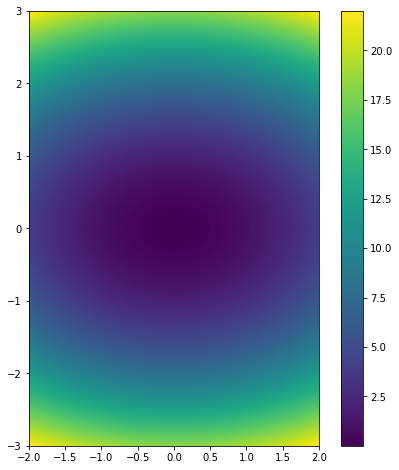

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(M_values, extent=[-2,2,-3,3])
plt.colorbar()
plt.show()

In this code:
- ``figsize=(8,8)`` creates an 8x8 figure that includes everything
- ``plt.imshow`` creates the color plot
- ``extent = [x_min, x_max, y_min, y_max]`` sets the min and max values of x and y
- ``plt.colorbar()`` creates the color bar on the right

<b>Example:  Double Slit Interference Pattern</b>.  

Let's observe the interference pattern of a double slit at any y and at any L (while keeping d and wavelength fixed).  We need functions to deal with the double slit intensity pattern.  To do this, make sure you download the file ``interference.py`` and put it in the same folder as this notebook.  

First, we want to ``import`` the functions in this file with an import statement.  When we use the statement ``import numpy as np``, we import all the functions in ``numpy`` and we use those functions with the abbreviation ``np`` (e.g., ``np.linspace( )``).  So, use ``import interference as write_your_abbreviation_here``.  Ok, you should choose something shorter than that.  Don't use anything that Python likes to use (e.g., ``int`` means something, so don't use that).

In [20]:
import interference as intfer


Say you said ``import interference as inter``, then we can use the function ``inter.DoubleSlitIntensity(y,d,L,lam)`` to get the intensity at location ``y`` mm, with slit spacing ``d`` mm, on the screen distance ``L`` m away, with wavelength ``lam`` nm.  Let's fix d = 0.05 mm and $\lambda$ = 400 nm, so we would use ``inter.DoubleSlitIntensity(y, 0.05, L, 400)`` (remember, you're replacing ``inter`` with whatever abbreviation you used alongside ``import interference``.

Now, let's make our plot:
- Create two arrays:  y values (in mm), with 200 points linearly spaced between -50 and 50 mm; and L values (in m) with 100 points linearly spaced between 0 and 2 m.
- Create a matrix of zeros such that the number of rows match with the length of y, and the number of columns match with the length of L (use len, and also remember that the ${\tt np.zeros}$ command requires two sets of parentheses).
- Use a nested for loop to assign the individual elements of your matrix using your intensity function.  To do this, you're going to have to use as inputs to your intensity function the ``y[i]`` from the appropriate row and the ``L[j]`` from the appropriate column.  (e.g., ``inter.DoubleSlitIntensity(y[i],0.05,L[j],400)``)
- Use ``imshow`` to create a heat map.  Here, you should use ``extent=[0,2,-50,50]``, also introduce ``aspect=0.02`` to stretch out the horizontal scale, so: ``plt.imshow(YourMatrixName,extent=[0,2,-50,50],aspect=0.02)``, where ``YourMatrixName`` is the name of the matrix you created.

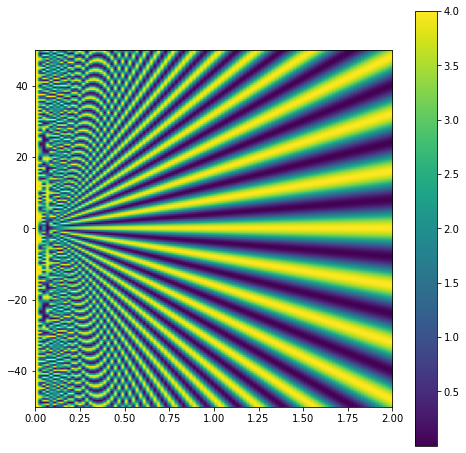

In [21]:
y_values = np.linspace(-50, 50, 200)
L_values = np.linspace(0, 2, 100)
M_values = np.zeros((len(y_values), len(L_values)))

for i in range(len(y_values)):
    for j in range(len(L_values)):
        M_values[i,j] = intfer.DoubleSlitIntensity(y_values[i], .05, L_values[j], 400)
        
plt.figure(figsize = (8,8))
plt.imshow(M_values, extent= [0,2,-50,50], aspect=0.02)
plt.colorbar()
plt.show()


## Now it's your turn.
**Interference pattern from holes in 2-dimensions**.  Rather than interference from slits, we will look at the interference pattern from tiny holes arranged in a circular pattern.

The file ``interference.py`` includes a function, ``NIntensity2D()`` whose inputs are: ``x_in_mm``, ``y_in_mm``, and ``N`` (the number of tiny holes).  

Now, let's create a heat map of the intensity.  **Create a function** whose input is ``N``, and uses that value of ``N`` to create the intensity pattern from N-holes.  To do this, you should:
- Create two linearly spaces arrays to represent the x- and y-axes, each array should span from -50 to 50 mm, with 100 points each.
- Create a matrix that will store the intensities for the locations (x,y) on the spring
- Use the nested ``for`` loops to fill in all the terms of the matrix.  Note that the first two inputs of the ``NIntensity2D`` function that you import from ``interference`` are in mm, so there is no need for any unit conversions.
    - In your nested loops, you should be very careful to use the appropriate indexes for x and y.  Look at your previous example to recognize how we associate the first index (rows) with y, and the second index (columns) with x.
- Create a heat map.  Note that you'll want to use the appropriate values for the ``extent`` input to ``imshow``, but also you can either not include ``aspect`` or try ``aspect=1``.

**Test your function for N = 4.**

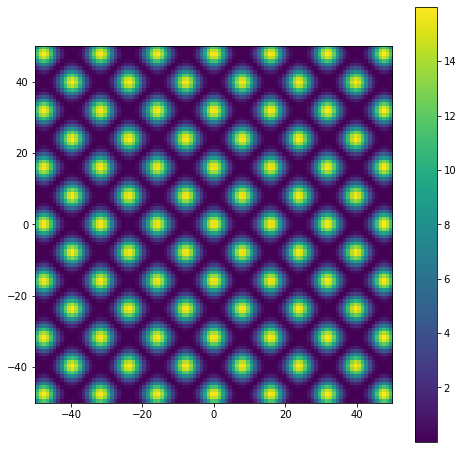

In [28]:
def intferpat_holes(N):
    x_axis = np.linspace(-50,50,100)
    y_axis = np.linspace(-50,50,100)
    M_intensities = np.zeros((len(y_axis), len(x_axis)))
    
    for i in range(len(y_axis)):
        for j in range(len(x_axis)):
            M_intensities[i,j] = intfer.NIntensity2D(x_axis[j], y_axis[i], N)
            
    plt.figure(figsize=(8,8))
    plt.imshow(M_intensities, extent = [-50,50,-50,50], aspect=1)
    plt.colorbar()
    plt.show()
    
intferpat_holes(4)

Create a slider that allows you to look at N = 2 to 10.

In [34]:
widgets.interact(intferpat_holes, N=(2,10))

interactive(children=(IntSlider(value=6, description='N', max=10, min=2), Output()), _dom_classes=('widget-int…

<function __main__.intferpat_holes(N)>

## Completing this lab in its entirety is Homework 5.  Please Submit by Monday, March 28

Before you submit, make sure that your code works with Kernel > Restart & Run All